## Problem Overview
 

### Description 
The overarching purpose of our research project is it study the relationship between different risk factors that can cause cardiovascular disease. We believe it is an important undertaking because we are always looking to understand the relationships between lifestyle and health. With science-backed findings, we want to help individuals in making better decisions, communities in promoting healthier public health practices, and governments in finding the best balance in resource-allocation between public healthcare and research and development.

### Background
For decades now, cardiovascular disease has been the leading killer of Americans. In the past years however, advances in biomedical research has improved emergency response systems and treatment, and public health has been better in prevention efforts. [Source: CVD: A costly burden for America](https://healthmetrics.heart.org/wp-content/uploads/2017/10/Cardiovascular-Disease-A-Costly-Burden.pdf). Even so, cardiovascular disease continues to be the leading cause of death, a major cause of disability, and a major contributor to productivity loss in Americans. In fact, an estimated 71.3 million--about one in three--Americans have one or more types of heart disease. This burden translates not only in the loss of life, but also affects society’s quality of lives and puts a toll on public healthcare spending that could otherwise be put into other social good programs. Prevention is usually much cheaper to invest in than treatment, and so understanding risk factors has a huge potential impact on reducing burden. [Source: An overview of CVD burden in the U.S.](https://www.healthaffairs.org/doi/full/10.1377/hlthaff.26.1.38)

### Data Description and Features
Data description: We will be working on a dataset about cardiovascular disease [available on Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) that consists of 70,000 records of patients data. We were particularly interested in exploring a research question in the domain of healthcare. We wanted to understand the relationship between some given risk factors that contribute to a certain disease. The main outcome that we are concerned with is the presence or absence of cardiovascular disease. Our search led us to this dataset and had all the relevant information that we could use to predict cardiovascular disease. 

There are 3 types of input features:
1. Objective: factual information
2. Examination: results of medical examination
3. Subjective: information given by the patient



| Feature | Variable Type   | Variable   | Value Type  |
|------|------|------|------|
|   Age  | Objective Feature|age | int(days)|
|   Height  | Objective Feature |height |int(cm)|
|   Weight  | Objective Feature |weight |float(kg)|
|   Gender  | Objective Feature |gender |categorical code|
|   Systolic blood pressure  | Examination Feature |ap_hi |int|
|   Diastolic blood pressure  | Examination Feature |ap_lo |int|
|   Cholesterol  | Examination Feature |cholesterol |1: normal, 2: above normal, 3: well above normal|
|   Glucose  | Examination Feature | gluc |1: normal, 2: above normal, 3: well above normal|
|   Smoking | Subjective Feature |smoke |binary|
|   Alcohol Intake | Subjective Feature |alco |binary|
|   smoking | Subjective Feature |smoke |binary|
|   Physical Activity | Subjective Feature |active|binary|
|   Presence or absence of cardiovascular disease | Target Variable |cardio |binary|


## Data Analysis

In [2]:
import pandas as pd    
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
# read the data from csv file
df = pd.read_csv('data/cardio_train.csv', sep=';', index_col = "id")

In [4]:
# convert the unit of the column "age" in days into in years
df['age_in_years'] = (df['age'] / 365).round().astype('int')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


We create a new feature - Body Mass Index (BMI):

$$BMI=\frac{mass(kg)}{height(m)^2}$$ 


In [5]:
# create a column called BMI 
df['bmi'] = df['weight'] /  ((df['height'] / 100) ** 2)

In [6]:
# create a new column called bmi_scale
conditions = [(df['bmi'] < 18.5), ((df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)), ((df['bmi'] > 24.9) & (df['bmi'] <= 29.9)), (df['bmi'] > 29.9) ]
choices = [1,2,3,4] #["Underweight", "Healthy", "Overweight", "Obese"]
df['bmi_scale'] = np.select(conditions, choices, default=np.nan).astype('int')

In [7]:
# check if the dataframe has any missing values
df.isnull().values.any()

False

In [8]:
# create a column called blood pressure where we categorize 'Systolic blood pressure'  & 'Diastolic blood pressure'
conditions = [\
              ((df['ap_hi'] < 120) & (df['ap_lo'] < 80)), \
              (((df['ap_hi'] >= 120) & (df['ap_hi'] <= 129)) & (df['ap_lo'] < 80)), \
              (((df['ap_hi'] >= 130) & (df['ap_hi'] <= 139)) | ((df['ap_lo'] >= 80) & (df['ap_lo'] <= 89))), \
              (((df['ap_hi'] >= 140) & (df['ap_hi'] <= 180)) | ((df['ap_lo'] >= 90) & (df['ap_lo'] <= 120))), \
              ((df['ap_hi'] > 180) | (df['ap_lo'] > 120))]
choices = [1, 2, 3, 4, 5] #["Normal", "Elevated", "High Blood Pressure: Stage 1", "High Blood Pressure: Stage 2", "Hypertensive crisis"]
df['blood_pressure'] = np.select(conditions, choices).astype('int')

In [9]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale,blood_pressure
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2,3
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,4,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,2,3
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3,4
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,2,1
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,3,3
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,4,3
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,4,3
13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,3,1


## Univariate Analysis

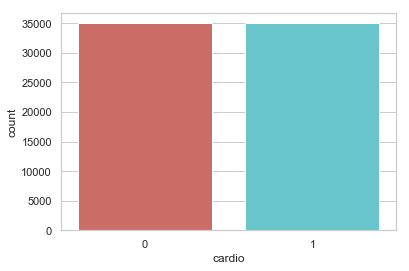

In [10]:
# create a graph that showcases the distribution of people who have and don't have the cardiovascular disease
df['cardio'].value_counts()
sns.countplot(x="cardio", data=df, palette="hls")
plt.show()

In [11]:
# make a function that creates a stacked bar of different features versus Cardiovascular disease
def viz_stack(df, factor, title, xlabel, ylabel, xlabels, rot): 
    table=pd.crosstab(df[factor],df.cardio)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     plt.xticks(range(len(xlabels)), xlabels, rotation=rot)

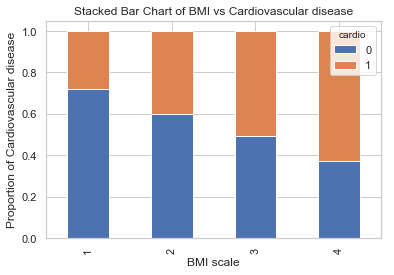

In [12]:
# creates a stacked bar of BMI scale versus proportion of Cardiovascular disease
bmi_xlabels =  ['Underweight', "Healthy", "Overweight", "Obese"]
viz_stack(df, "bmi_scale", "Stacked Bar Chart of BMI vs Cardiovascular disease", "BMI scale", "Proportion of Cardiovascular disease", bmi_xlabels, 0)


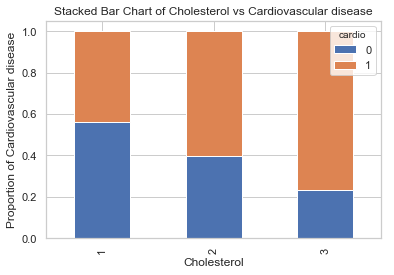

In [13]:
# creates a stacked bar of Cholesterol versus proportion of Cardiovascular disease
cholesterol_xlabels = ["Normal", "Above Normal", "Way above Normal"]
viz_stack(df, "cholesterol", "Stacked Bar Chart of Cholesterol vs Cardiovascular disease", "Cholesterol", "Proportion of Cardiovascular disease", cholesterol_xlabels, 90)


In [14]:
# use describe function to display statistics such as min, max, mean and std for each features 
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale,blood_pressure
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513,2.894786,2.931200
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511,0.804068,0.919126
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,1.000000,1.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,2.000000,3.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068,3.000000,3.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222,4.000000,3.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667,4.000000,5.000000


From the table above, we can see that there are outliers in ap_hi, ap_lo, weight, and height. 

In [112]:
# display sample statisitcs for the column 'height'
df.describe().height

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

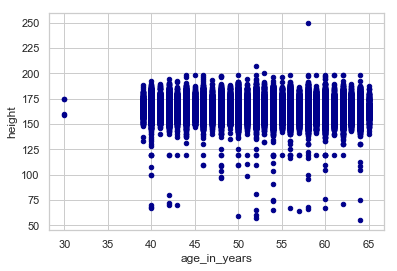

In [113]:
# create a scatter plot that tells us which dots could be considered as outliers 
df_after = df
ax1 = df.plot.scatter(x='age_in_years', y='height', c='DarkBlue')

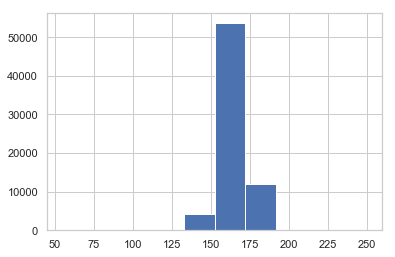

In [114]:
# create a histogram that displays the distribution of individual's height
df.height.hist()

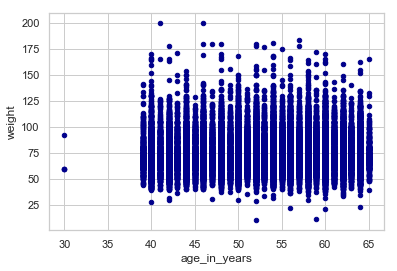

In [115]:
# create a scatter plot that tells us which dots could be considered as outliers 
ax1 = df.plot.scatter(x='age_in_years', y='weight', c='DarkBlue')

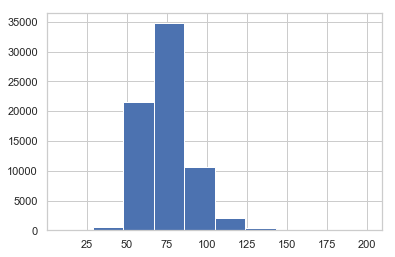

In [116]:
# create a histogram that displays the distribution of individual's weight
df.weight.hist()

In [118]:
# get rid of outliers by dropping whichever values that falls below 2.5% or above 97.5% 
df_after.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df_after.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

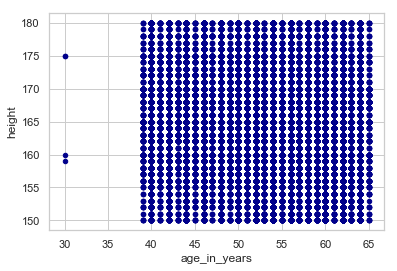

In [119]:
# create a scatter plot that shows the correlation between age and height after getting rid of outliers
height2 = df_after.plot.scatter(x='age_in_years', y='height', c='DarkBlue')

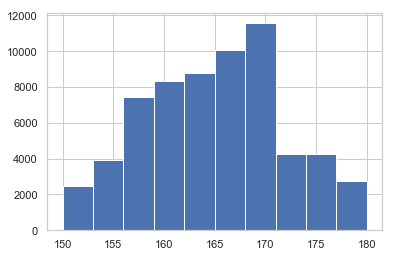

In [120]:
# create a histogram that shows the distribution of height after getting rid of outliers
df_after.height.hist()

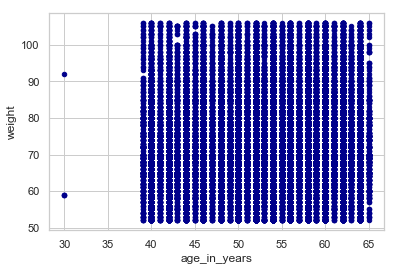

In [121]:
# create a scatter plot that shows the correlation between age and weight after getting rid of outliers
weight2 = df_after.plot.scatter(x='age_in_years', y='weight', c='DarkBlue')

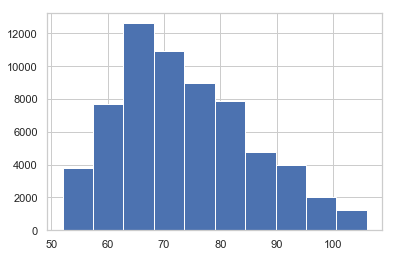

In [122]:
# create a histogram that shows the distribution of weight after getting rid of outliers
df_after.weight.hist()

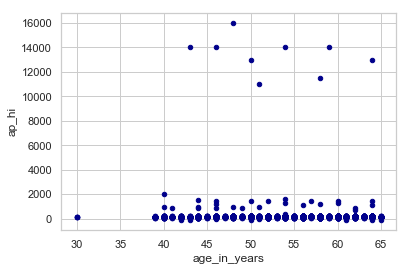

In [123]:
# create a scatter plot that tells us which dots could be considered as outliers for systolic blood pressure
blood_hi = df.plot.scatter(x='age_in_years', y='ap_hi', c='DarkBlue')

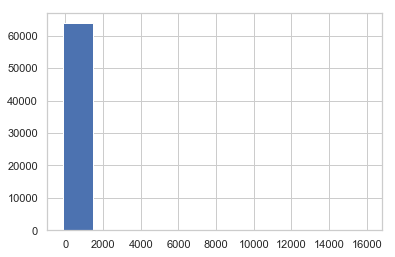

In [124]:
# create a histogram that displays the distribution of each individual's systolic blood pressure
df.ap_hi.hist()

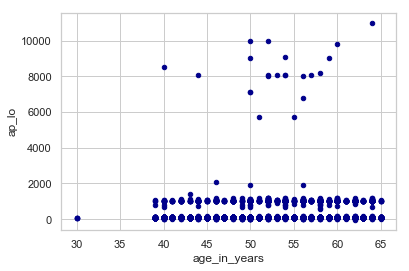

In [125]:
# create a scatter plot that tells us which dots could be considered as outliers for diastolic blood pressure
blood_hi = df.plot.scatter(x='age_in_years', y='ap_lo', c='DarkBlue')

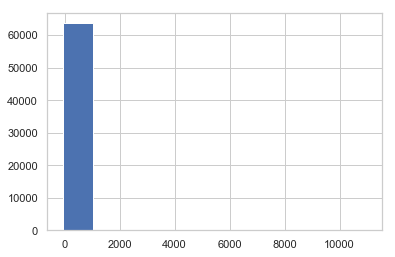

In [126]:
# create a histogram that displays the distribution of each individual's diastolic blood pressure
df.ap_lo.hist()

In [127]:
# get rid of outliers by dropping whichever values that falls below 2.5% or above 97.5% for systolic blood pressure and diastolic blood pressure
df_after.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df_after.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [128]:
# check if there's any diastilic pressure higher than systolic blood pressure 
# (Diastilic pressure is not supposed to be higher than systolic blood pressure)
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


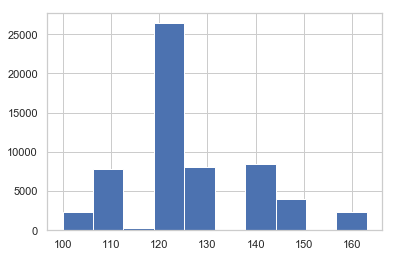

In [129]:
# create a histogram that shows the distribution of systolic blood pressure after getting rid of outliers
df_after.ap_hi.hist()

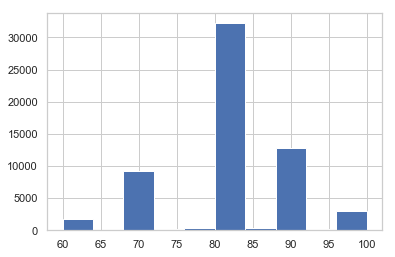

In [130]:
# create a histogram that shows the distribution of diastolic blood pressure after getting rid of outliers
df_after.ap_lo.hist()

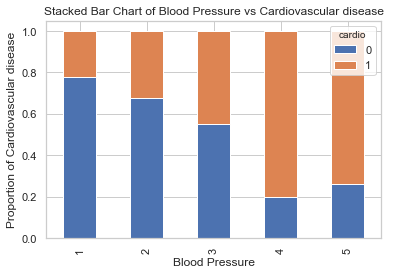

In [13]:
# creates a stacked bar of Blood pressure versus proportion of Cardiovascular disease
blood_xlabels = ["Normal", "Elevated", "High Blood Pressure: Stage 1", "High Blood Pressure: Stage 2", "Hypertensive crisis"]
viz_stack(df, "blood_pressure", "Stacked Bar Chart of Blood Pressure vs Cardiovascular disease", "Blood Pressure", "Proportion of Cardiovascular disease", blood_xlabels, 90)

AttributeError: 'NoneType' object has no attribute 'create_artists'

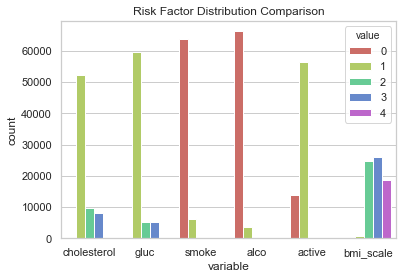

In [15]:

# df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active', 'bmi_scale']] 
# g = sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), palette="hls");
# plt.title("Risk Factor Distribution Comparison")
# handletext = ["Cholestrol", "Glucose", "Smoke", "Alcohol", "Activity", "BMI Scale"]
# labels = ["A", "B", "C", "D"]


# t = g.get_xticklabels()
# labeldic = dict(zip(handletext, labels))
# handles = [(h.get_text(), c.get_fc()) for h,c in zip(t, g.patches)]

# g.legend(handles, labels)
# plt.show()


In [138]:
# label values

# df_labeled = df.copy()

# conditions = [\
#               ((df['ap_hi'] < 120) & (df['ap_lo'] < 80)), \
#               (((df['ap_hi'] >= 120) & (df['ap_hi'] <= 129)) & (df['ap_lo'] < 80)), \
#               (((df['ap_hi'] >= 130) & (df['ap_hi'] <= 139)) | ((df['ap_lo'] >= 80) & (df['ap_lo'] <= 89))), \
#               (((df['ap_hi'] >= 140) & (df['ap_hi'] <= 180)) | ((df['ap_lo'] >= 90) & (df['ap_lo'] <= 120))), \
#               ((df['ap_hi'] > 180) | (df['ap_lo'] > 120))]
# choices = ["Normal", "Elevated", "High Blood Pressure: Stage 1", "High Blood Pressure: Stage 2", "Hypertensive crisis"]
# df_labeled['blood_pressure'] = np.select(conditions, choices)

# df_labeled['smoke']=np.where(df_labeled.gluc==0, "no", "yes")
# df_labeled['alco']=np.where(df_labeled.alco==0, "no", "yes")
# df_labeled['active']=np.where(df_labeled.active==0, "no", "yes")
# df_labeled['cardio']=np.where(df_labeled.cardio==0, "no", "yes")
# df_labeled['gender']=np.where(df_labeled.gender==1, "woman", "man")

# #not working

# conditions = [((df))
              
              
# df_labeled['cholesterol'] = np.select([df['cholestrol'] == 1, 2, 3], ["normal", "above normal", "way above normal"])
# df_labeled['gluc'] = np.select([1, 2, 3], ["normal", "above normal", "way above normal"])
# df_labeled['bmi_scale']=np.select([1, 2, 3, 4], ["Underweight", "Healthy", "Overweight", "Obese"])


SyntaxError: invalid syntax (<ipython-input-138-feac9378d52c>, line 25)

In [136]:
# def something(df, col, choices, num):
#     condictions = [True for i in range(num)]#, (df[col] == 2), (df[col] == 3), (df[col] == 4), ]
#     df[col] = np.select(conditions, choices)
    
     

In [137]:
# something(df_labeled, "cholesterol", ["normal", "above normal", "way above normal"], 3)

ValueError: list of cases must be same length as list of conditions

In [140]:
# df['cholesterol'] == 1

id
0         True
1        False
2        False
3         True
4         True
8        False
9        False
12       False
13        True
14        True
15        True
16        True
18        True
21        True
23        True
24        True
25        True
27        True
28        True
29        True
30        True
31        True
32       False
33        True
35       False
36       False
37        True
38        True
39        True
40        True
         ...  
99958    False
99959     True
99960     True
99961     True
99962     True
99963     True
99964    False
99965     True
99967     True
99969    False
99971     True
99972    False
99973     True
99974     True
99975     True
99977     True
99978     True
99979     True
99981     True
99985     True
99986     True
99988    False
99990     True
99991     True
99992     True
99993     True
99995    False
99996    False
99998     True
99999    False
Name: cholesterol, Length: 70000, dtype: bool

In [90]:
df_labeled

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale,blood_pressure
id,,,,,,,,,,,,,,,,
0,18393,man,168,62.0,110,80,normal,normal,yes,no,yes,no,50,21.967120,Underweight,High Blood Pressure: Stage 1
1,20228,woman,156,85.0,140,90,normal,normal,yes,no,yes,yes,55,34.927679,Underweight,High Blood Pressure: Stage 2
2,18857,woman,165,64.0,130,70,normal,normal,yes,no,no,yes,52,23.507805,Underweight,High Blood Pressure: Stage 1
3,17623,man,169,82.0,150,100,normal,normal,yes,no,yes,yes,48,28.710479,Underweight,High Blood Pressure: Stage 2
4,17474,woman,156,56.0,100,60,normal,normal,yes,no,no,no,48,23.011177,Underweight,Normal
8,21914,woman,151,67.0,120,80,normal,normal,yes,no,no,no,60,29.384676,Underweight,High Blood Pressure: Stage 1
9,22113,woman,157,93.0,130,80,normal,normal,yes,no,yes,no,61,37.729725,Underweight,High Blood Pressure: Stage 1
12,22584,man,178,95.0,130,90,normal,normal,yes,no,yes,yes,62,29.983588,Underweight,High Blood Pressure: Stage 1
13,17668,woman,158,71.0,110,70,normal,normal,yes,no,yes,no,48,28.440955,Underweight,Normal


TypeError: zip argument #2 must support iteration

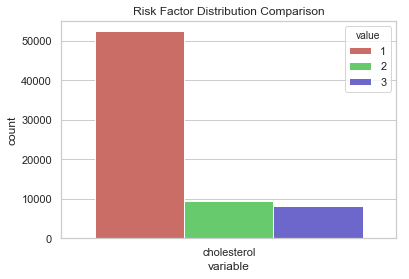

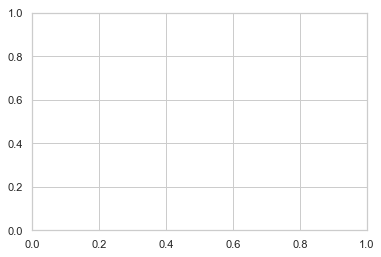

In [10]:
df_categorical = df.loc[:,['cholesterol']] 
g = sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), palette="hls");
plt.title("Risk Factor Distribution Comparison")
handletext = ["Cholesterol"]
new_labels = ["normal", "above normal", "way above normal"]
#for t, l in zip(plt.legend.texts, new_labels): t.set_txt(l)
fig, ax = plt.subplots()
ax.legend(g, new_labels)

Text(0.5, 1.0, 'Risk Factor Distribution Comparison')

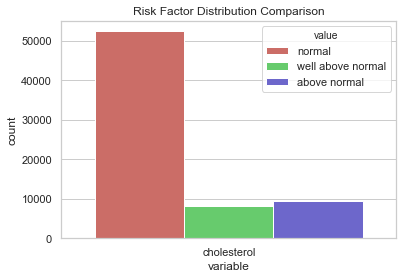

In [43]:
df_categorical = test.loc[:,['cholesterol']] 
g = sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), palette="hls");
plt.title("Risk Factor Distribution Comparison")

In [24]:
labeldic

{'Cholestrol': 'A', 'Glucose': 'B', 'Smoke': 'C', 'Alcohol': 'D'}

This is the distribution of our data across different factors, particularly cholesterol levels, glucose levels, smoker status, alcohol drinker status, and bmi category. From here, we can see that most of the individuals in the dataset have normal cholesterol levels and normal glucose levels. Most of them also don't smoke, don't drink, and are inactive in lifestyle. Looking at the BMI scale distribution, the largest category that individuals fall under are overweight, followed by healthy, obese, and underweight.

In [ ]:
df_categorical = ['cholesterol','gluc', 'smoke', 'alco', 'active', 'bmi_scale'] 
grouped = df.groupby('cardio').count()
sns.countplot(x=df_categorical, hue="age",data=df, palette="hls");
# plt.title("Risk Factor Distribution Comparison")
# plt.show()


In [235]:
grouped

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years,bmi,bmi_scale,Blood Pressure,blood_pressure
cardio,,,,,,,,,,,,,,,,
0,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021
1,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979


In [1]:
# fig, ax = plt.subplots()
# ax.scatter(z, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))

In [2]:
# df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active', 'bmi_scale']] 
# g = sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), palette="hls");
# plt.title("Risk Factor Distribution Comparison")
# for index, row in df.iterrows():
# #     print(row)
# #     break
#     g.text(row.smoke,row.cardio, round(2.0, 2), color='black', ha="center")
# # plt.show()


In [262]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Multivariate Analysis

## Machine learning